In [34]:
import cv2
import supervision as sv
from ultralytics import YOLO
import numpy as np

In [35]:
image = cv2.imread("img\horses.jpg")

In [36]:
model = YOLO('yolov8s.pt')

In [37]:
# result = model.predict(image)[0]

In [38]:

#Lấy phần tử đầu tiên của kết quả trả về: bounding boxes, độ tin cậy, nhãn lớp
result = model.predict(image, conf=0.5, iou = 1, nms = False)[0]


0: 448x640 32 horses, 163.6ms
Speed: 3.3ms preprocess, 163.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


In [39]:
#Lưu các thông tin đã trích xuất từ result vào các thuộc tính:
#xyxy, confidence, class_idid
detections = sv.Detections.from_ultralytics(result)
detections 

Detections(xyxy=array([[    0.21212,      301.92,      436.14,      753.58],
       [   0.079622,      301.14,      435.61,      754.14],
       [    0.23741,      301.57,      435.82,         755],
       [    0.13172,      302.12,       436.1,      754.01],
       [    0.39642,      300.35,      433.52,      753.56],
       [    0.12102,      301.19,      434.17,      754.52],
       [   0.040426,      302.07,      433.76,      753.58],
       [    0.13395,       300.9,      434.02,       753.5],
       [   0.093441,      300.55,      435.15,      753.99],
       [     365.04,      253.19,       855.5,      764.45],
       [      364.2,      253.58,      854.63,      759.72],
       [     740.09,      332.07,      1175.9,      723.86],
       [   0.011215,      301.48,      435.29,      753.51],
       [     738.98,      331.93,      1175.4,      724.88],
       [     363.73,      252.35,      855.16,      759.31],
       [     365.03,      252.85,      856.29,         765],
       [

In [40]:
import matplotlib.pyplot as plt

In [41]:
a = detections['xyxy'] = detections.xyxy
a

array([[    0.21212,      301.92,      436.14,      753.58],
       [   0.079622,      301.14,      435.61,      754.14],
       [    0.23741,      301.57,      435.82,         755],
       [    0.13172,      302.12,       436.1,      754.01],
       [    0.39642,      300.35,      433.52,      753.56],
       [    0.12102,      301.19,      434.17,      754.52],
       [   0.040426,      302.07,      433.76,      753.58],
       [    0.13395,       300.9,      434.02,       753.5],
       [   0.093441,      300.55,      435.15,      753.99],
       [     365.04,      253.19,       855.5,      764.45],
       [      364.2,      253.58,      854.63,      759.72],
       [     740.09,      332.07,      1175.9,      723.86],
       [   0.011215,      301.48,      435.29,      753.51],
       [     738.98,      331.93,      1175.4,      724.88],
       [     363.73,      252.35,      855.16,      759.31],
       [     365.03,      252.85,      856.29,         765],
       [     363.94,    

In [42]:
temp = np.array(a) 
temp = temp.astype(int)
temp  

array([[   0,  301,  436,  753],
       [   0,  301,  435,  754],
       [   0,  301,  435,  754],
       [   0,  302,  436,  754],
       [   0,  300,  433,  753],
       [   0,  301,  434,  754],
       [   0,  302,  433,  753],
       [   0,  300,  434,  753],
       [   0,  300,  435,  753],
       [ 365,  253,  855,  764],
       [ 364,  253,  854,  759],
       [ 740,  332, 1175,  723],
       [   0,  301,  435,  753],
       [ 738,  331, 1175,  724],
       [ 363,  252,  855,  759],
       [ 365,  252,  856,  765],
       [ 363,  252,  856,  764],
       [ 738,  331, 1176,  724],
       [ 365,  252,  856,  765],
       [ 738,  330, 1176,  724],
       [ 365,  253,  855,  763],
       [ 738,  330, 1175,  724],
       [ 365,  254,  853,  763],
       [ 739,  330, 1175,  723],
       [ 364,  254,  852,  762],
       [ 737,  328, 1177,  724],
       [ 744,  330, 1175,  723],
       [ 736,  330, 1177,  725],
       [ 737,  332, 1175,  724],
       [ 366,  253,  855,  764],
       [ 7

#### Kết quả trước khi áp dụng NMS

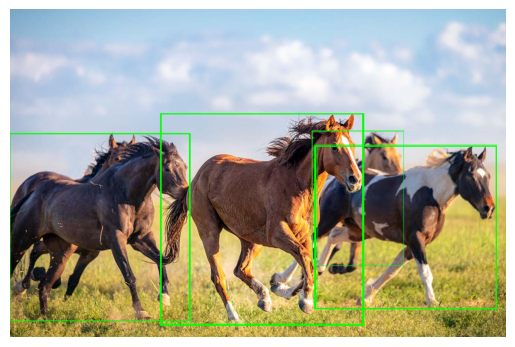

In [43]:
image_before_nms = image.copy()
for xmin, ymin, xmax, ymax in temp:
    cv2.rectangle(image_before_nms, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_before_nms, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
b = detections.confidence
b = np.array(b)
b = b.astype(float)
b

array([    0.95227,     0.94699,     0.94445,     0.94049,     0.93302,     0.93246,     0.92773,     0.91699,     0.91349,     0.91326,     0.90857,     0.90813,     0.90795,     0.90748,     0.90354,     0.90126,     0.89977,     0.89919,     0.89865,     0.89662,     0.89291,     0.88854,     0.88831,      0.8871,
           0.88572,      0.8732,     0.86524,     0.85005,     0.84997,     0.62474,     0.57144,     0.55291])

In [45]:
new_dataset = zip(temp, b)
tmp = 0
for boxes, score in new_dataset:
    print(f"Index: {tmp}, Bounding box: {boxes}, Confidence: {score}")
    tmp += 1 

Index: 0, Bounding box: [  0 301 436 753], Confidence: 0.9522722363471985
Index: 1, Bounding box: [  0 301 435 754], Confidence: 0.9469934105873108
Index: 2, Bounding box: [  0 301 435 754], Confidence: 0.9444547295570374
Index: 3, Bounding box: [  0 302 436 754], Confidence: 0.9404878616333008
Index: 4, Bounding box: [  0 300 433 753], Confidence: 0.9330233931541443
Index: 5, Bounding box: [  0 301 434 754], Confidence: 0.9324564933776855
Index: 6, Bounding box: [  0 302 433 753], Confidence: 0.9277315735816956
Index: 7, Bounding box: [  0 300 434 753], Confidence: 0.9169867634773254
Index: 8, Bounding box: [  0 300 435 753], Confidence: 0.9134858250617981
Index: 9, Bounding box: [365 253 855 764], Confidence: 0.9132583737373352
Index: 10, Bounding box: [364 253 854 759], Confidence: 0.9085744619369507
Index: 11, Bounding box: [ 740  332 1175  723], Confidence: 0.9081341624259949
Index: 12, Bounding box: [  0 301 435 753], Confidence: 0.9079481959342957
Index: 13, Bounding box: [ 738 

In [46]:
new_dataset = zip(temp, b)
bounding_box =[]
score_bb = []
for boxes, score in new_dataset:
    bounding_box.append(boxes)
    score_bb.append(score)

In [47]:
bounding_box = np.array(bounding_box)
bounding_box = bounding_box.astype(int)
bounding_box

array([[   0,  301,  436,  753],
       [   0,  301,  435,  754],
       [   0,  301,  435,  754],
       [   0,  302,  436,  754],
       [   0,  300,  433,  753],
       [   0,  301,  434,  754],
       [   0,  302,  433,  753],
       [   0,  300,  434,  753],
       [   0,  300,  435,  753],
       [ 365,  253,  855,  764],
       [ 364,  253,  854,  759],
       [ 740,  332, 1175,  723],
       [   0,  301,  435,  753],
       [ 738,  331, 1175,  724],
       [ 363,  252,  855,  759],
       [ 365,  252,  856,  765],
       [ 363,  252,  856,  764],
       [ 738,  331, 1176,  724],
       [ 365,  252,  856,  765],
       [ 738,  330, 1176,  724],
       [ 365,  253,  855,  763],
       [ 738,  330, 1175,  724],
       [ 365,  254,  853,  763],
       [ 739,  330, 1175,  723],
       [ 364,  254,  852,  762],
       [ 737,  328, 1177,  724],
       [ 744,  330, 1175,  723],
       [ 736,  330, 1177,  725],
       [ 737,  332, 1175,  724],
       [ 366,  253,  855,  764],
       [ 7

In [48]:
score_bb = np.array(score_bb)
score_bb

array([    0.95227,     0.94699,     0.94445,     0.94049,     0.93302,     0.93246,     0.92773,     0.91699,     0.91349,     0.91326,     0.90857,     0.90813,     0.90795,     0.90748,     0.90354,     0.90126,     0.89977,     0.89919,     0.89865,     0.89662,     0.89291,     0.88854,     0.88831,      0.8871,
           0.88572,      0.8732,     0.86524,     0.85005,     0.84997,     0.62474,     0.57144,     0.55291])

In [49]:
indices = cv2.dnn.NMSBoxes(bboxes=bounding_box, scores=score_bb,
                           score_threshold=0, nms_threshold=0.7)
print(indices)

[ 0  9 11 30]


In [50]:
filtered_boxes = [bounding_box[i] for i in indices.flatten()]
filtered_boxes

[array([  0, 301, 436, 753]),
 array([365, 253, 855, 764]),
 array([ 740,  332, 1175,  723]),
 array([730, 294, 952, 620])]

In [51]:
filtered_scores = [score_bb[i] for i in indices.flatten()]
filtered_scores

[np.float64(0.9522722363471985),
 np.float64(0.9132583737373352),
 np.float64(0.9081341624259949),
 np.float64(0.5714352130889893)]

#### Kết quả sau khi áp dụng NMS với ngưỡng threshold = 0.7

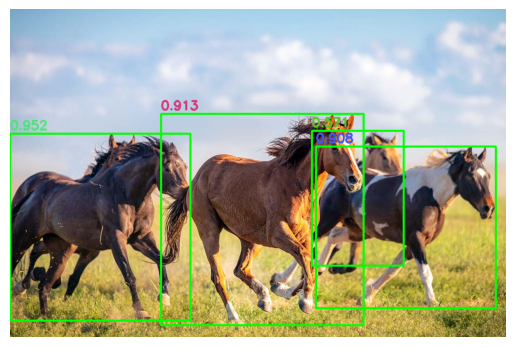

In [52]:
image_with_scores = image.copy()

for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes, filtered_scores):
    color = tuple(np.random.randint(0, 256, size=3).tolist())
    cv2.rectangle(image_with_scores, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)
    text = f"{score:.3f}"
    cv2.putText(image_with_scores, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_with_scores, cv2.COLOR_BGR2RGB))
plt.show()

In [53]:
for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes, filtered_scores):
    print(f"Bounding box: ({xmin}, {ymin}), ({xmax}, {ymax}) - Score: {score:.3f}")

Bounding box: (0, 301), (436, 753) - Score: 0.952
Bounding box: (365, 253), (855, 764) - Score: 0.913
Bounding box: (740, 332), (1175, 723) - Score: 0.908
Bounding box: (730, 294), (952, 620) - Score: 0.571


#### Threshold 0.5

In [54]:
new_indices = cv2.dnn.NMSBoxes(bboxes=bounding_box, scores=score_bb,
                           score_threshold=0, nms_threshold=0.5)
print(new_indices)

[ 0  9 11]


In [55]:
filtered_boxes_nms05 = [bounding_box[i] for i in new_indices.flatten()]
filtered_boxes_nms05

[array([  0, 301, 436, 753]),
 array([365, 253, 855, 764]),
 array([ 740,  332, 1175,  723])]

In [56]:
filtered_scores_nms05 = [score_bb[i] for i in new_indices.flatten()]
filtered_scores_nms05

[np.float64(0.9522722363471985),
 np.float64(0.9132583737373352),
 np.float64(0.9081341624259949)]

#### Kết quả sau khi áp dụng NMS với ngưỡng Threshold = 0.5

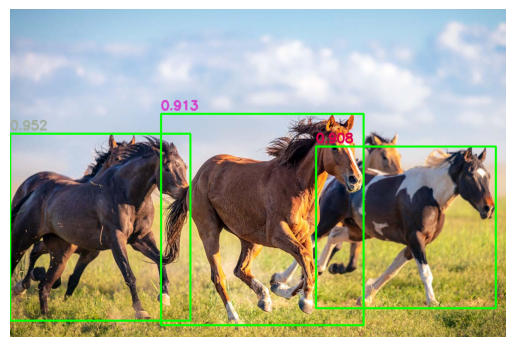

In [57]:
image_with_soft = image.copy()

for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes_nms05, filtered_scores_nms05):
    color = tuple(np.random.randint(0, 256, size=3).tolist())
    cv2.rectangle(image_with_soft, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)
    text = f"{score:.3f}"
    cv2.putText(image_with_soft, text, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

plt.axis('off')
plt.imshow(cv2.cvtColor(image_with_soft, cv2.COLOR_BGR2RGB))
plt.show()

In [58]:
for (xmin, ymin, xmax, ymax), score in zip(filtered_boxes_nms05, filtered_scores_nms05):
    print(f"Bounding box: ({xmin}, {ymin}), ({xmax}, {ymax}) - Score: {score:.3f}")

Bounding box: (0, 301), (436, 753) - Score: 0.952
Bounding box: (365, 253), (855, 764) - Score: 0.913
Bounding box: (740, 332), (1175, 723) - Score: 0.908
